In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 상관계수

###### 정규성이 없는 데이터를 정규성을 갖도록 실습 2020/09/29 수업

### 자료 형태: 양적 / 질적 자료

- 양적 자료: 수치형 자료

  - 수치형 자료: 연속형, 이산형 자료로 구분

    > 연속형: 값이 끊어지지 않고 연속적으로 이어지는 자료 (키, 몸무게 등)
    >
    > 이산형: 정수로 나누어지는 자료 (수술 횟수 등)

- 질적 자료: 범주형 자료

  - 범부형 자료: 명목형, 순서형 자료로 구분

    >명목형: 범주들 간에 순서적인 의미가 없는 자료 (혈액형 등)
    >
    >순서형: 범주들 간에 순서적인 의미가 있는 자료 (학점, 아주좋음, 좋음, 보통...등 / 연령대, 10대, 20대,..)

이러한 자료들을 갖고 상관 분석을 진행한다.

#### 상관계수는 자료 형태에 따라 종류가 나누어짐

1. 피어슨 상관계수 (모수적 방법) : 연속형 & 연속형 상관계수
   - 두 변수가 모두 정규성을 따른다는 가정이 필요 (모수적 방법)

**모집단**: 알고싶은 전체 집단

코로나 환자가 있는데, (A라는 약 개발 / 투여 / 얼마나 효과가 있는지 궁금 / 전세계에 있는 모든 환자에 대해 궁금) : 전세계 환자가 모집단, 그런데 전세계를 알기가 어려움. 표본에 대한 표준편차 분산 등을 통해서 모집단을 예측

모수? 모집단 통계치 (평균, 표준편차, 분산 등)

#### 모수적 방법? (피어슨 상관분석)

- 연속형 변수

- 중심극한정리? 모집단이 평균, 표준편차 
  - (오해의 요소: 내가 수집한 표본의 크기가 크면 이 표본의 평균이 모집단의 표본과 같고 는 잘못된 생각...)
  - 모집단에서 표본크기가 n인 표본(30개 이상)을 여러 번 추출 (예: 100번 추출) 했을때
  - **표본평균분포** : 1번째 추출: 표본평균, ... 100번째 추출: 표본 평균 들이 이루는 분포
  - 중심극한정리는 표본의 크기가 커질수록 (30개 이상), 표본 평균들이 이루는 분포가 모집단의 평균과 모집단의 표준편차가 정규분포에 가까워진다는 정리임

#### 비모수적 방법? (스피어만 상관분석, 켄달[타우])

- 서열이 있는 두 변수들 간의 상관관계

- 정규분포를 따르지 않는다고 증명 or 표본이 (30개 미만, 10개 미만) 소규모인 경우에는 정규분포임을 가정할 수 없을때 비모수적 방법을 사용.
- 자료를 크기 순으로 배열 -> 순위(서열) 매김 -> 순위 합계를 구해서 합계간의 차이를 비교

#### 명목형(이산형) & 명목형(이산형) : 파이계수

- 두 변수가 모두 binary 일때 두 변수간의 상관 계수

#### |상관계수|

- 0.7이상 => 상관관계가 매우 강함
- 0.3이상 => 상관관계가 있음
- 0.1~0.3이상 => 매우 약한 상관관계가 있음
- 0~0.1 => 무상관



**척도**: 변수 값을 표현하는 수준

**명명척도**: (혈액형), 서열척도(순서형, 직급), 등간척도(순서 & 간격 일정, 연산 가능)







##### [**베이지안 이론1**](https://bioinformaticsandme.tistory.com/47)

##### [**베이지안 이론2**](https://ddiri01.tistory.com/234)

##### [베이즈 정리](https://junpyopark.github.io/bayes/)



In [43]:
#범주형

#numpy
bloodtype=['A','A','A','B','B','AB','O']
np.unique(bloodtype)
np.unique(bloodtype, return_counts=True)
# np.unique(bloodtype, return_counts=True)[1]
# np.unique(bloodtype, return_counts=True)[1][0]

#pandas
pd.Series(bloodtype)
pd.Series(bloodtype).value_counts()

A     3
B     2
O     1
AB    1
dtype: int64

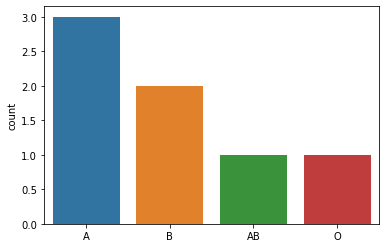

In [44]:
sns.countplot(bloodtype)

In [49]:
# 연속형 변수
x = [1,1,1,2,3,5,5,7,8,9]

# 데이터 범위를 4구간
hist, edges=np.histogram(x,4) #구간 경계 :array([1., 3., 5., 7., 9.])
# a=np.histogram(x,4)[0]
# a=np.histogram(x,4)[1]
hist, edges

(array([4, 1, 2, 3]), array([1., 3., 5., 7., 9.]))

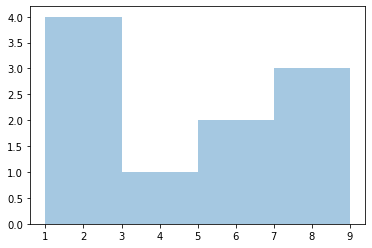

In [50]:
sns.distplot(x, bins=4, kde = False)

In [52]:
# 중심경향 (평균, 최빈수, 중앙값) : 자료 전체 대표
x = [100,100,200,400,500]
np.mean(x) # 평균은 극단치(아웃라이어) 영향을 크게 받는다
#소득 분포처럼 비대칭인 자료에 대해서는 평균값이 자료를 대표하기 어려움
np.median(x) # 중위수는 극단치(아웃라이어) 영향을 잘 받지 않는다

from scipy.stats import mode
mode(x)

ModeResult(mode=array([100]), count=array([2]))

In [6]:
x=[1,1,1,2,3,5,5,7,8,9]
# 흩어진 정도 (분산, 표준편차, 사분위)
np.min(x)
np.max(x)-np.min(x) # 자료 범위 (자료의 퍼짐 정도)
# 분산? 평균으로부터 자료가 얼마나 벗어나 있는지를 나타내는 정도
# 데이터-평균 => 제곱 => 평균
# 분산이 큼? 데이터가 평균에서 많이 벗어나 있다.
# 분산이 작음? 데이터가 평균 주변에 모여 있다.
np.var(x) #분산

8.36

In [7]:
#분산 양의 제곱근
np.std(x)
np.sqrt(np.var(x))

2.891366458960192

In [8]:
# IQR: 3사분위수(Q3, 75%) - 1사분위수(Q1, 25%)
# 사분위수: 데이터를 오름차순 정렬 -> 4등분 -> 각 지점에 해당되는 값 (1,2,3,4 사분위수)
x

[1, 1, 1, 2, 3, 5, 5, 7, 8, 9]

In [10]:
np.quantile(x, .25) #1사분위수(Q1, 25%)
np.quantile(x, .5) 
np.quantile(x, .75) #3사분위수(Q3, 75%)

6.5

In [11]:
np.quantile(x, .5) 
np.median(x)

4.0

In [14]:
# IQR 이 범위 밖은 극단치
IQR=np.quantile(x, .75)-np.quantile(x, .25)
IQR

5.25

In [15]:
# 대부분의 자료는 중심 부분에 많이 몰려있는 경향이 있음
# 평균에서 표준편차의 k배 만큼 떨어져 있다 -> k 표준편차

# 표준편차 : 평균에서 떨어진 정도
# IQR : 중간값에서 벗어난 정도

### [공분산 참고](https://m.blog.naver.com/PostView.nhn?blogId=sw4r&logNo=221025662499&proxyReferer=https:%2F%2Fwww.google.com%2F)

In [16]:
# 공분산 (covariance) : 두 변수가 함께 변화하는 정도를 나타내는 지표
x = [7,3,6,6,9,4,3,9,3,5]
y = [6,2,4,6,10,5,1,8,4,5]

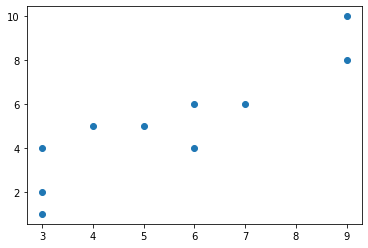

In [18]:
# 산점도 (scatter plot)
plt.plot(x,y, 'o')

In [22]:
print(np.cov(x,y))
print(np.cov(x,y)[0,1])

[[5.38888889 5.5       ]
 [5.5        6.98888889]]
5.499999999999999


In [24]:
np.var(x)

4.85

In [25]:
np.var(y)

6.290000000000001

In [26]:
# 공분산 해석: 
# + : 두 변수가 같은 방향으로 변화
# - : 두 변수가 반대 방향으로 변화
# 0 : 두 변수가 독립 (서로 아무 상관이 없다.)
# 주의할점:
# cov(x,y) ; 5
# cov(a,b) ; 1000
# 절대적 크기로 해석을 하면 안된다 / 수치의 의미
# 공분산 만으로는 직접적인 비교가 어려움으로 
#  공분산 -> 표준화 (-1~1) => 상관계수

In [27]:
# 상관계수 : 두 변수가 함께 변하는 정도, -1 ~ +1 (면접 질문)

In [30]:
#피어슨 상관계수 (일반적)
np.corrcoef(x,y)
np.corrcoef(x,y)[0,1] #상관계수

0.8962083932927004

In [37]:
# x, y의 공분산 
cov=np.cov(x,y)[0,1]
cov #5.5
# x 의 표준편차 
xsd=np.std(x, ddof=1) #x의 표본표준편차, 2.2
# y 의 표준편차 
ysd=np.std(y, ddof=1) #y의 표본표준편차, 2.51
cov/(xsd*ysd) #상관계수

0.8962083932927

상관계수를 제곱하면? 분산(변화량)에서 공유하는 비율  
ex) x, y의 상관계수가 0.7 -> 제곱하면 0.49 (49%)  
의미: x의 분산중 49% 를 y와 공유한다는 의미임. x의 분산중 49%가 y로 설명할 수 있음  

피어슨 상관계수는 선셩적인 관계 측정. 비선형적인 변화의 경우에는 잘 측정하지 못함  

In [38]:
# 스피어만 상관계수
# 서열척도, 비선형적인 관계
import scipy.stats
scipy.stats.spearmanr(x,y).correlation

0.8972354465472708

In [39]:
# 캔달 상관계수: 비선형적 & 서열척도 (표본이 작을때)
scipy.stats.kendalltau(x,y).correlation

0.8051175601825398

In [40]:
# 상관계수 통계적 검증
x = [7,3,6,6,9,4,3,9,3,5]
y = [6,2,4,6,10,5,1,8,4,5]

In [42]:
scipy.stats.pearsonr(x,y) 
# 상관계수 0.89
# p value: 0.0004
# p value: 0.05 (임계치), p값이 0.05 보다 작은경우 "통계적으로 유의미하다" 표현
# 0.89라는 값에대해 신뢰할 수 있다.

(0.8962083932927004, 0.00044718052488489286)

유의수준, 유의확률(p value), 귀무/대립 가설, 1종/2종 오류

귀무 / 대립 가설?

20대 남자들의 키와 30대 남자들의 키가 다르다.

20대와 30대 남자들 각 30명씩 -> 키 측정 -> 각 집단 평균 (기술통계)

표본으로 추론
- 추론 통계: 가설을 세우고, 그 가설을 입증
    - 이때 처음 세운 가설: **귀무 가설**
    - 실험자가 입증해야 하는 가설: **대립 가설**
추론 통계 -> 귀무가설을 기각
ex) 가설: 범죄자가 범인이라는 가설을 입증하고자 한다면 -> 귀무가설: 범죄자는 범인이 아니다.
귀무가설을 기각(범죄자가 범인이다) 하기 위해 입증 자료 수집함

실험자가 범할 수 있는 오류
1종 오류: 귀무가설이 참인데 기각한 경우 (죄가 없는 범인이 죄가 있다고 말한 경우)  
2종 오류: 귀무가설이 거짓인데 기각하지 않은 경우 (죄가 있는 범인이 죄가 없다고 말한 경우)

1종 2종의 오류중 더 심각한것은 1종 오류이다.  
1종 (심각) > 2종  
죄가 없는데 있다고 한경우 더 억울하다.

- 유의 수준 : 1종 오류를 범할 수 있는 최대 허용 한계
    - ex) 유의수준 : 0.05%(5%)로 정함 -> 100번 실험했을 때 1종 오류를 범할 수 있는 최대 허용 한계 5번
    - 정밀도 요구되는 실험 : 0.01(1%)
    
- 유의 확률: p - value, 1종 오류를 범할 확률
    - ex) 0.05(5%) : 100번 실험했을 때 1종 오류를 5번 범한 경우.
    - 의미? 95% 신뢰도로 귀무가설을 기각한다는 의미
    - 0 <= p value <= 1
- p-value 값이 유의 수준 (0.05)보다 낮다 -> 실험이 통계적으로 의미가 있다!!!

상관분석 고려 사항
- 산점도 (선형선(직선) 확인)
- 곡선형? 스피어만, 캔달 상관분석

- 상관관계가 있다고 해서 반드시 인과관계가 있는 건 아니다.
- ex) 제 3변인의 문제
    - 서울에서 범죄 발생 건수와 종교 시설의 개수
    - 양의 상관관계 (교회가 많으면 많을수록 범죄율도 높다) 이 둘사이에 직접적인 관계가 있는것이 아님
        - 제 3의 변인이 있음
    - 극단치로 인한 인위적 상관관계 있을 수 있음.

### 회귀분석 ?

- 독립변수(x)입력변수로 종속변수(y)를 예측하는것

### 혼입변수?

- 모델에는 포함되지 않지만, 종속변수에 영향을 주는 변수

### 선형회기분석?

- 회기분석은 종속변수가 연속인 경우 (regression)
- 종속변수가 **범주**인 경우 : 분류 (classification)
- 선형회기분석: 독립변수와 종속변수 사이에 직선적인 형태의 관계가 있다고 가정하고 분석
- 직선적인 형태? 독립변수가 증가 => 종속변수도 비례하여 증가 or 감소

선형회귀모델에서 x, y 관계 수식 : y=wx + b (w: **weight**, b: **bias**(error) 또는 e를(error 따로 붙인다))

> **w**: 가중치 or 회귀계수,  
>
> 독립변수 x가 1증가하면 종속변수 y는 w만큼 증가한다.  
>
> **b**: 절편(독립변수가 0일때 종속변수 y의 값)

#### 왜도 / 첨도

- #### **왜도**

- 중앙값 > 평균: (오른쪽으로 길게 늘어진 경우): 왜도가 0보다 큰 양수
- 중앙값 < 평균: (왼쪽으로 길게 늘어진 경우): 왜도가 0보다 작은 음수
- 좌우가 대칭: (정규분포): 왜도가 0



- #### 첨도

- 자료의 분포가 뾰족한 정도
- 정규분포 : 첨도가 0
- 중간이 뾰족한경우: 첨도가 0보다 큰 양수
- 중간이 평평한경우: 첨도가 0보다 작은 음수

In [43]:
#회귀분석
df=pd.read_csv("cars.csv")
df

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


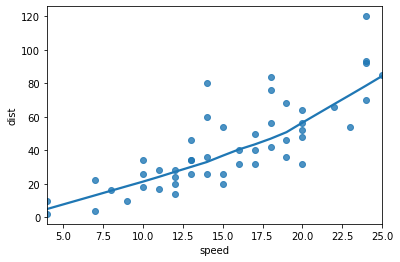

In [45]:
#독립변수: speed, 종속변수: dist
#산점도 & 선형적인 패턴 확인
sns.regplot('speed', 'dist', lowess=True, data=df)

Text(0.5, 1.0, 'car dist')

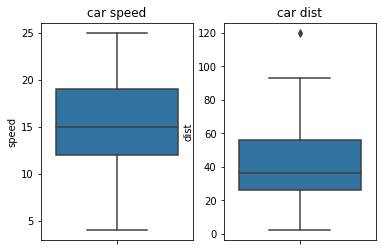

In [48]:
# 회귀분석에서는 박스플랏을 꼭 그려서 극단치가 있는지 확인!
fig, (ax1,ax2)=plt.subplots(1,2)
sns.boxplot('speed', data=df, ax=ax1, orient='v') #orient v or h(horizontal)
ax1.set_title('car speed')
sns.boxplot('dist', data=df, ax=ax2, orient='v')
ax2.set_title('car dist')

#가로 선을 벗어난 데이터가 있으면 극단치가 있는 것이다.
#car dist에 하나가 있다. 이 데이터의경우 하나정도는 무시해도 되는경우임

Text(0.5, 1.0, 'car dist')

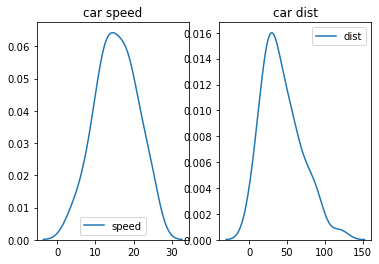

In [50]:
#선형회귀분석: 독립변수와 종속변수가 정규분포를 따를 때 잘 작동
#밀도 플랏: 정규분포 형태 확인
fig, (ax1,ax2)=plt.subplots(1,2)
sns.kdeplot(df['speed'], ax=ax1) #orient v or h(horizontal)
ax1.set_title('car speed')
sns.kdeplot(df['dist'], ax=ax2)
ax2.set_title('car dist')

In [52]:
#왜도
scipy.stats.skew(df['speed']) #-0.11395477012828319
scipy.stats.skew(df['dist']) #0.7824835173114966

0.7824835173114966

[왜도/첨도(scipy.stats.skew)](https://namyoungkim.github.io/python/scipy/2017/10/09/scipy/)

In [53]:
from statsmodels.formula.api import ols

In [55]:
res=ols("dist~speed",data=df).fit() #종속변수 ~ 독립변수, 회귀 모델 생성

In [56]:
res.summary() #회귀 모델에대한 요약 정보

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           1.49e-12
Time:                        14:29:30   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared = 0.651  
R-squared: 모델 설명력, dist의 분산을 speed가 약 65%를 설명  
Prob (F-statistic):	1.49e-12 == 작으므로 통계적으로 유의미함 (p<0.05)

**회기계수:**  
coef: 계수의 추정치  
\-17.5791 + 3.9324*speed  
speed가 1증가하면, dist는 3.9324 증가한다. (의미)

결론:
회귀분석 결과
dist에 대하여 speed 로 예측하는 회귀분석을 실시한 결과, 이 회귀모델은 통계적으로 유의미함
(F-statistic: 89.57, p<0.05)  
독립변수에 대하여 speed의 회기계수는 3.9324로, dist에 대하여 유의미한 예측 변수라는 것이 나타남  
p<0.05